In [ ]:
#----------------------------------------------------------------------------------------#
# Add diffusers path to sys path
import sys
import os
from dotenv import load_dotenv;
# Load the .env file
load_dotenv()
# Get Diffusers path from environment variable
diffusers_path = os.getenv('DIFFUSERS_PATH')
print(f"Diffusers path: {diffusers_path}")
if diffusers_path is None:
    raise ValueError("Please set DIFFUSERS_PATH environment variable to Diffusers path")
sys.path.append(diffusers_path+"/src")
#----------------------------------------------------------------------------------------#

In [1]:
import diffusers

2023-07-14 09:33:40.707261: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 09:33:41.635973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Text2Image Pipeline Testi

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-0.9", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

prompt = "An astronaut riding a green horse"

images = pipe(prompt=prompt).images[0]
display(images)


In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-0.9", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.to("cuda")

prompt = "An astronaut riding a green horse"
image = pipe(prompt=prompt).images[0]
display(image)

# Refiner

In [ ]:
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
import torch

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-0.9", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.to("cuda")

use_refiner = True
refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-0.9", torch_dtype=torch.float16, use_safetensors=True, variant="fp16"
)
refiner.to("cuda")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

image = pipe(prompt=prompt, output_type="pil" if use_refiner else "pil").images[0]
display(image)
image = refiner(prompt=prompt, image=image).images[0]
display(image)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

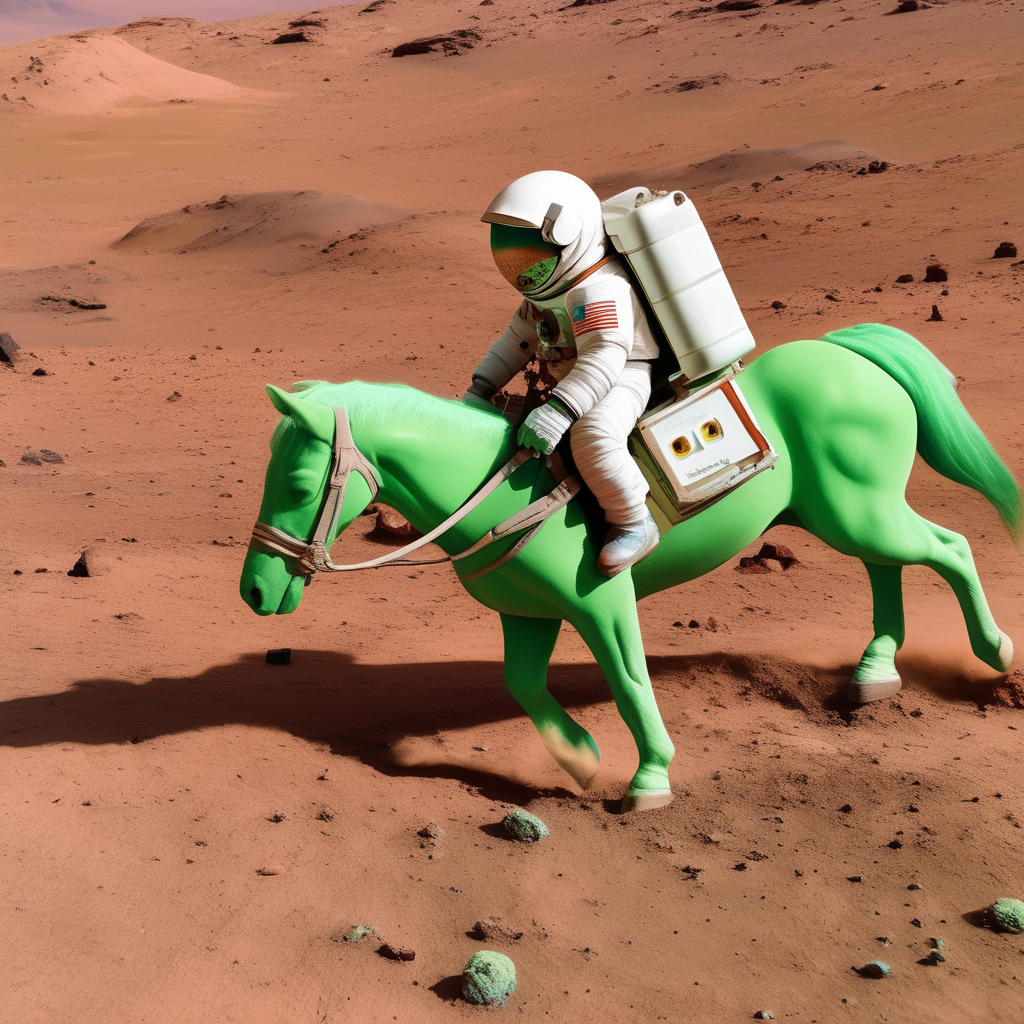

  0%|          | 0/15 [00:00<?, ?it/s]

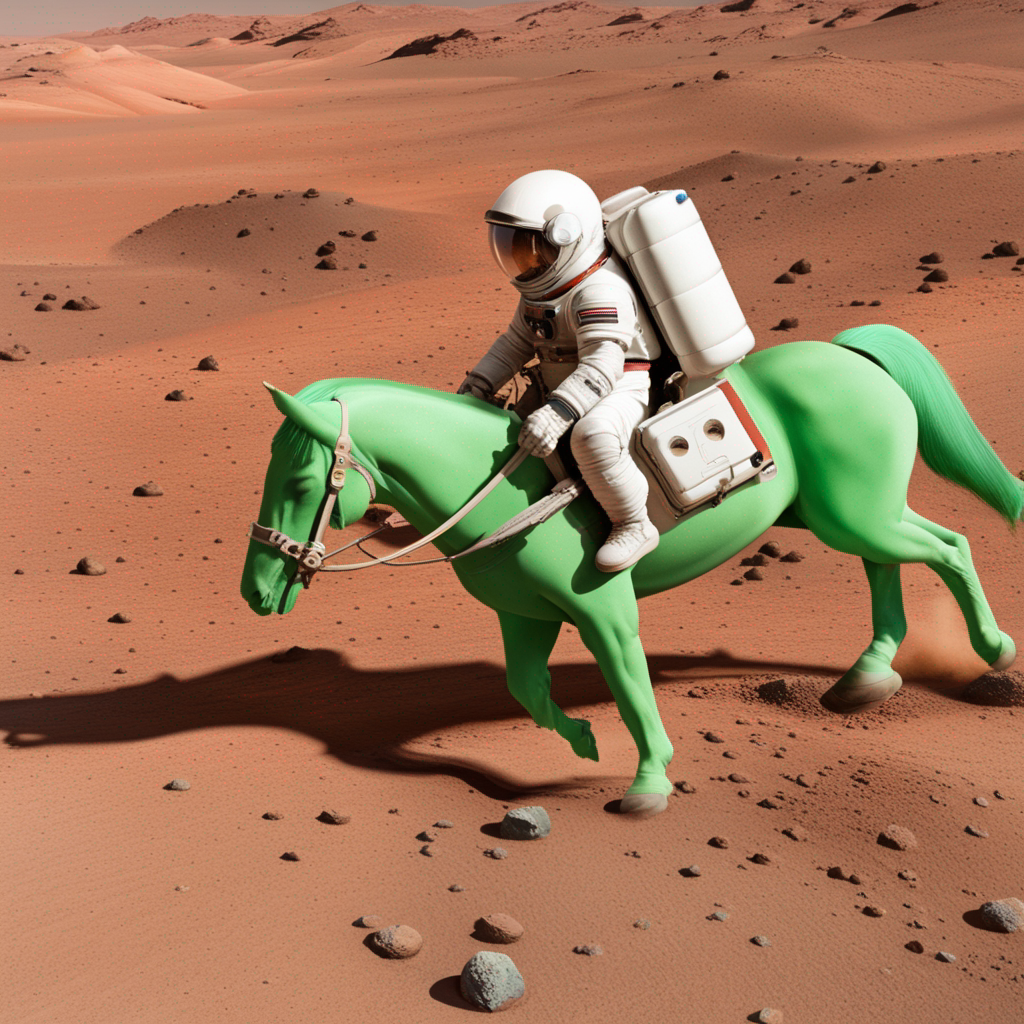

In [2]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers.utils import load_image

pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-0.9", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")
url = "https://huggingface.co/datasets/patrickvonplaten/images/resolve/main/aa_xl/000000009.png"

init_image = load_image(url).convert("RGB")
display(init_image)
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, image=init_image).images[0]
display(image)